<a href="https://colab.research.google.com/github/csoham96/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Importing the Librarires

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
!pip install pycountry -q 

     |████████████████████████████████| 10.1 MB 28.2 MB/s 


### Mounting google drive where the data is present

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the data into DataFrame

In [194]:
hotel_df=pd.read_csv('/content/drive/MyDrive/EDA capstone project/Hotel Bookings.csv')

In [195]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [196]:
#See the descriptive statistics of Dataframe
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#### Checking the first few data in the dataset

In [197]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [198]:
#Checking the shape of the data
hotel_df.shape

(119390, 32)

In [199]:
#cheking the null values in the data
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Our dataset has 119390 rows and 32 columns

By checking the info and null values we see that most of the columns are non null with exception of company which has large Null values(112593) and some columns like country,company,agent,children with few missing data

ADR column whic stands for Average Daily Revenue has negative values Which need to be handled

# Dealing with Missing Values

In [200]:
#Viewing the company column and various unique occurences
hotel_df['company'].value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: company, Length: 352, dtype: int64

In [201]:
#Viewing the agent column and various unique occurences
hotel_df['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [202]:
#Viewing the country column and various unique occurences
hotel_df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

We see that the maximum bookings are from the country PRT we can fill this with missing values

In [203]:
#Viewing the median and mean of the children
hotel_df['children'].median(),hotel_df['children'].mean()

(0.0, 0.10388990333874994)

Now we can fill the missing values with some values

For agent column we can fill the value with the median of value

In [204]:
# Filling agent with median value
hotel_df['agent'].fillna(hotel_df['agent'].median(),inplace=True)

For filling the children column we can replace it with median value

In [205]:
#Filling children with median data
hotel_df['children'].fillna(hotel_df['children'].median(),inplace=True)

For filling the countries column we can use the most occuring data and fill the null values by those 

In [206]:
#Filling country column with mode data
hotel_df['country'].fillna(hotel_df['country'].mode().to_string(),inplace=True)

For filling the company data we choose to fill it with 0 as it represents that the booking isnt associated with any company

In [207]:
#Filling company column with 0.0
hotel_df['company'].fillna(0.0,inplace=True)

In [208]:
# checking for null value again in the data
hotel_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

As we can see we have successfully imputed data with data and replaced all the NAN values

There many data where there are zero guests and they need to be removed from the table as they present no value in our analysis

In [209]:
hotel_df[hotel_df.children+hotel_df.adults+hotel_df.babies==0].shape

(180, 32)

As we can see that dataframe has around 180 datapoints where there are 0 guests so we can drop those rows containing 0 guests

In [210]:
#Dropping the data with 0 guests
hotel_df.drop(hotel_df[(hotel_df.adults+hotel_df.babies+hotel_df.children)==0].index,inplace=True)

##### Checking the ADR column for negative values


In [211]:
#Checking the description
hotel_df['adr'].describe()

count    119210.000000
mean        101.969092
std          50.434007
min          -6.380000
25%          69.500000
50%          94.950000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

The 75% quarter is 126 and Max is 5400

In [212]:
#Checking adr less than 0
hotel_df[hotel_df['adr']<0].shape

(1, 32)

In [213]:
#Checking adr less than 5
hotel_df[hotel_df['adr']<5].shape

(1873, 32)

There seems that only 1 data point has negative data so we can drop that column which wont affect much in our analysis

In [214]:
#Dropping the data with negative ADR
hotel_df.drop(hotel_df[hotel_df['adr']<0].index,inplace=True)

Also during the descriptive statistics we see there is one big outlier with ADR of 5400 we will remove that

In [215]:
hotel_df.drop(hotel_df[hotel_df['adr']==5400].index,inplace=True)

## Converting Data Types

In [216]:
#Checking the datatypes
hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

As we can see that some columns such as children, company, and agent are of float data type but contains Integer Values.We can convert them to int

In [217]:
#Converting float data types of integer like values to Int64 type
hotel_df[['children', 'company', 'agent']]=hotel_df[['children', 'company', 'agent']].astype('int64')

# Exploratory Data Analysis 

## Plotting Hotel Types

Checking the the hotel column for different types of Hotel

In [218]:
# Checking the Hotel columns for different values
hotel_df['hotel'].value_counts()

City Hotel      79162
Resort Hotel    40046
Name: hotel, dtype: int64

There are basically two types of hotel and that is City Hotel and Resort Hotel

Text(0, 0.5, 'Number of Hotels')

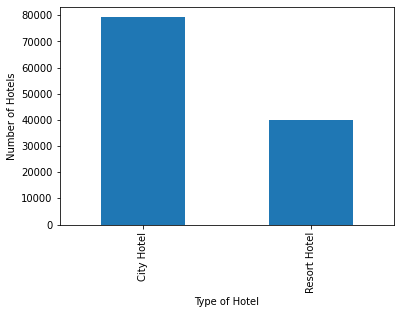

In [219]:
#Visualizing the types of Hotel using graph
hotel_df['hotel'].value_counts().plot(kind='bar')
plt.xlabel('Type of Hotel')
plt.ylabel('Number of Hotels')

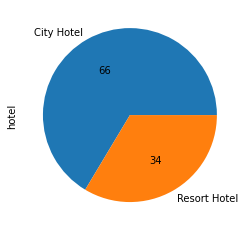

In [220]:
#Plotting the Pie chart of the types of hotel in the Dataset
hotel_df['hotel'].value_counts().plot(kind='pie',autopct='%.0f')

As we can see using two types of graph that 66% of Hotels are City Hotel and 34 % of hotels are Resort Hotel

## Plotting the Booking status

In [221]:
#Checking the is_canceled column
hotel_df['is_canceled'].value_counts()

0    75010
1    44198
Name: is_canceled, dtype: int64

Visualizing the Data of number of Booking that are cancelled

Text(0, 0.5, 'Number of Bookings')

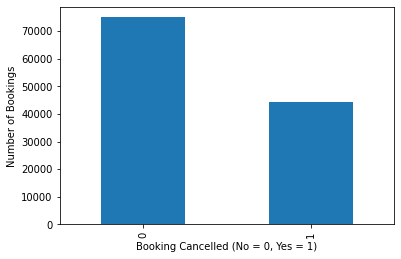

In [222]:
#plotting the booking status yes or no
hotel_df['is_canceled'].value_counts().plot(kind='bar')
plt.xlabel('Booking Cancelled (No = 0, Yes = 1)')#Setting the X-label
plt.ylabel('Number of Bookings')#Setting the Y-label

In [223]:
# Plotting Pie chart for Booking status
fig=px.pie(hotel_df,names='is_canceled',width=400,height=300,title='Booking Cancelled (No = 0, Yes = 1)')
fig.show()

As we can see 63 % bookings are done and around 37% bookings get cancelled

## Plotting box plot for lead_time

Lead time is time of duration of stay of each customer

In [224]:
# Plotting the box plot for lead time to see the distribution of data
fig = px.box(hotel_df, y="lead_time",width=600, height=600)
fig.show()

As we can see from the box plot that min time of stay is 0 median is 69
and most of the stay time is in between 18 to 161 but there are also many data points which lie above 161 with max stay of upto 737

## Plotting Box plot for adr(Average Daily Revenue)

In [264]:
#plotting the average daily revenue
px.box(hotel_df, y="adr",width=400, height=400,color='hotel')

As we can see from the box plot that Daily revenue of City Hotels are a bit more than Resort Hotels

In [226]:
#Plotting Histogram for Annual Daily Revenue
px.histogram(hotel_df,x='adr')

As we can see that average Daily Revenue is mostly between 69.5 and 126 with some days of Exclusivity

## Plotting the data for arrival date year

In [227]:
#Viewing the arrival date year 
hotel_df['arrival_date_year'].value_counts()

2016    56622
2017    40619
2015    21967
Name: arrival_date_year, dtype: int64

In [ ]:
# looking at the bar graph in different years
fig=px.bar(hotel_df['arrival_date_year'].value_counts(),width=600, height=400,title='Barchart for Year wise booking')
fig.update_layout(xaxis_title='Year',yaxis_title='Number of Bookings')
fig.show()

Bookings across different years

In [228]:
#Plotting the arrival date year
px.histogram(hotel_df, x="arrival_date_year", color="hotel",barmode='group',width=600, height=400)

From the Histogram we see that Different Distribution of bookings for the different Years of the different hotels


Text(0.5, 1.0, 'Pie chart for Year wise booking')

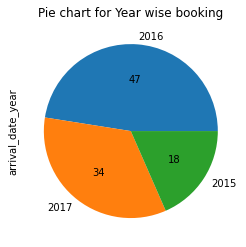

In [229]:
#Plotting Pie chart for the arrival date year to figure out the percentage
hotel_df['arrival_date_year'].value_counts().plot(kind='pie',autopct='%.0f')
plt.title('Pie chart for Year wise booking')

As we can see from the Pie chart that 47% of the total bookings were fron 2016 and subsequently 34% in 2017 and 18% in 2015. There is positive trend from 2015-2016 and then a negative trend from 2016-2017.Lets further break down the Years into months

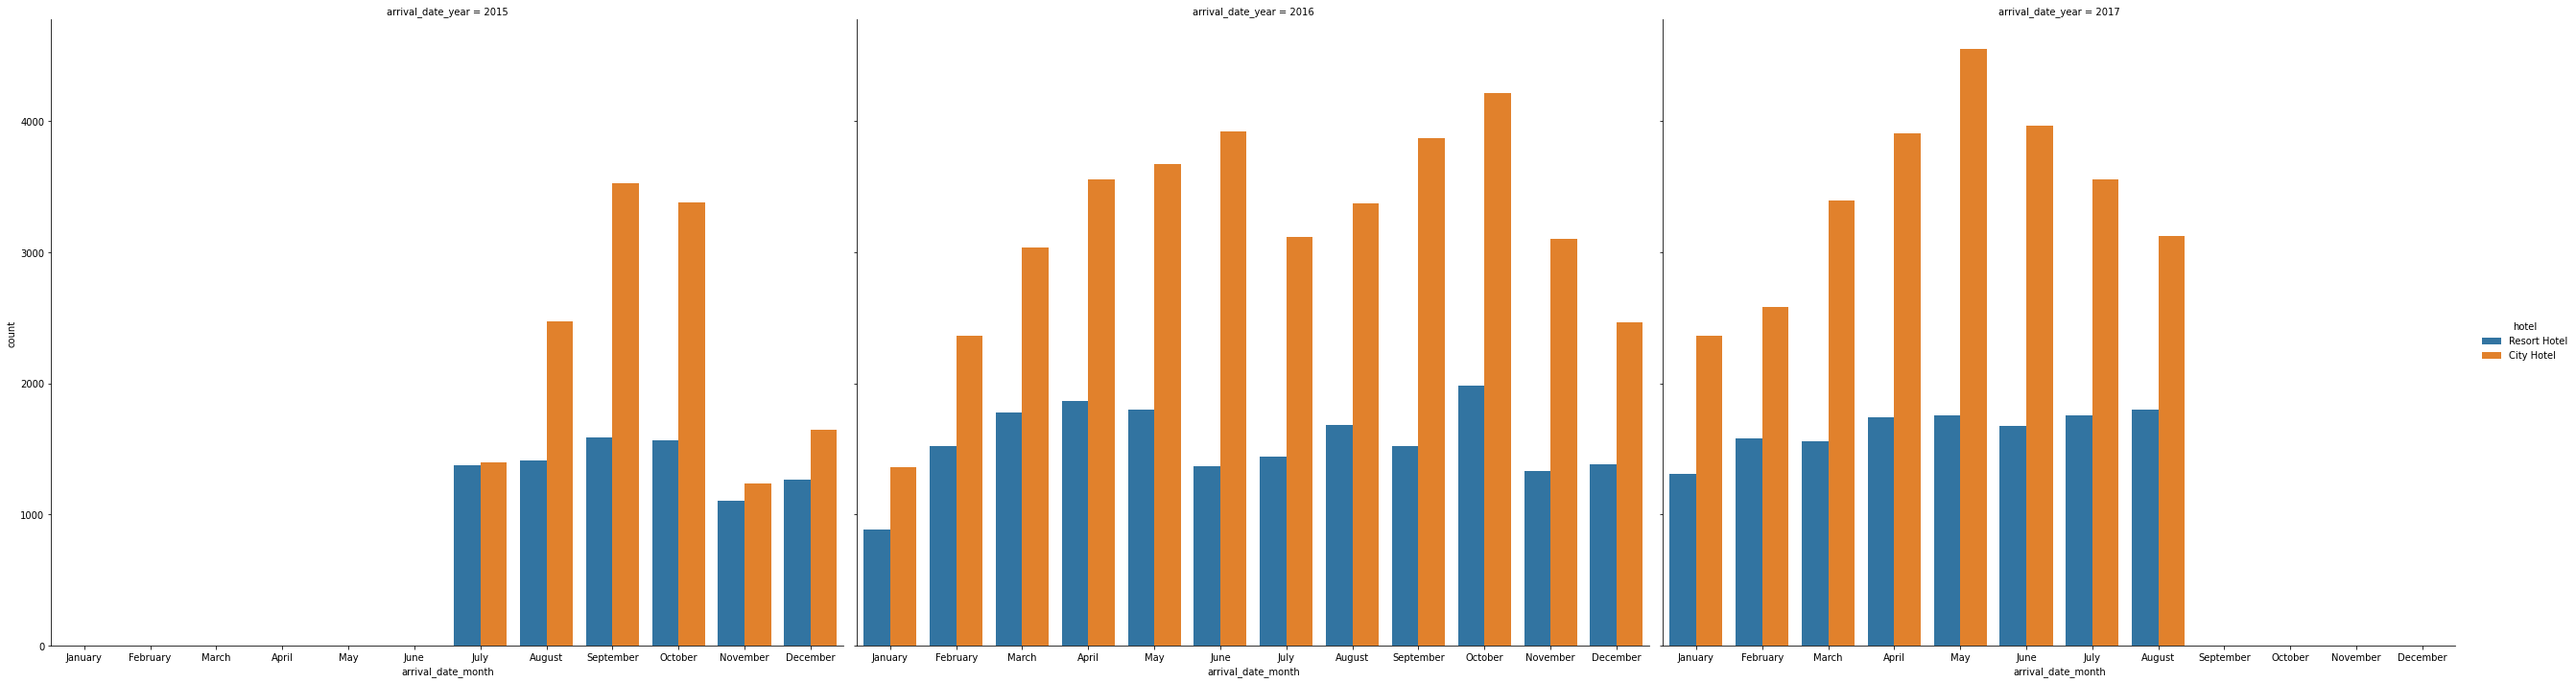

In [230]:
Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sns.catplot(data = hotel_df, x = 'arrival_date_month', hue = 'hotel', order =Months,col="arrival_date_year",kind="count",aspect=1.2,height=10)

As we Delve deeper into each year we see that that there is no data before July 2015 and no more data after August 2017 which might tell us that 2016 has so much more bookings 

## Plotting different Meals

In [248]:
#Viewing Different Meal types
hotel_df['meal'].value_counts()

Bed & Breakfast                                               92234
Half board (breakfast and one other meal – usually dinner)    14458
No meal package                                               10549
Undefined                                                      1169
Full board (breakfast, lunch and dinner)                        798
Name: meal, dtype: int64

In [241]:
#Changing the abreviations to understandable terms
meal ={'BB' :'Bed & Breakfast','HB' : 'Half board (breakfast and one other meal – usually dinner)',
      'FB':'Full board (breakfast, lunch and dinner)','SC':'No meal package'}
for keys,values in meal.items():
  # print (values)
  hotel_df["meal"] = np.where(hotel_df["meal"] == keys, values,hotel_df["meal"])
hotel_df['meal'].value_counts()    

Bed & Breakfast                                               92234
Half board (breakfast and one other meal – usually dinner)    14458
No meal package                                               10549
Undefined                                                      1169
Full board (breakfast, lunch and dinner)                        798
Name: meal, dtype: int64

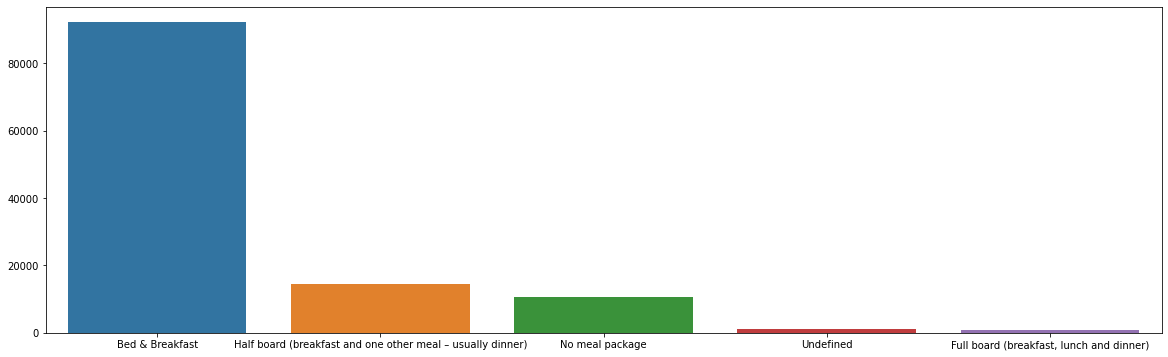

In [247]:
#Plotting the meal types of Customers
plt.figure(figsize=(20,6))
sns.barplot(hotel_df['meal'].value_counts().index.values,hotel_df['meal'].value_counts().values)

Clearly, majority of bookings are accompanied with a breakfast or dinner
Another key insight here is that there are few Full Board bookings. This gives an opportunity to the hotels to increase revenue from these type of meals by offering some discounts


## Plot arrival month 

In [ ]:
#Viewing the booking across different months
hotel_df['arrival_date_month'].value_counts()

August       13861
July         12644
May          11780
October      11147
April        11078
June         10929
September    10500
March         9768
February      8052
November      6771
December      6759
January       5921
Name: arrival_date_month, dtype: int64

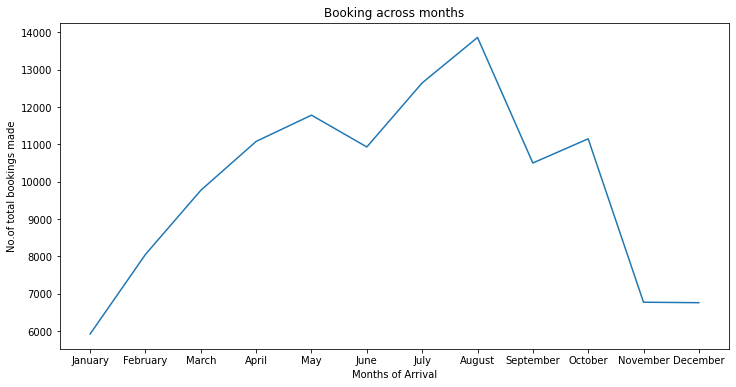

In [ ]:
#Visualizing the trend of Booking across different Months

#Keeping the months in an order in a list variable
Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

#reording months in order which they appear in a year
Reordered_months=hotel_df['arrival_date_month'].value_counts().reindex(Months)

#Setting the index as x
x=Reordered_months.index 
#Setting the values in y 
y=Reordered_months
# Setting figure size
plt.figure(figsize=(12, 6))
#Plotting the line graph
plt.plot(x,y)
#Setting X label and Y label
plt.xlabel('Months of Arrival')
plt.ylabel('No.of total bookings made')
#Setting the title
plt.title('Booking across months')
plt.show()

As we can see from the trend line most of the bookings occur from may to August and generally fall during the winter months. of November,December and January


Text(0, 0.5, 'No.of total bookings made')

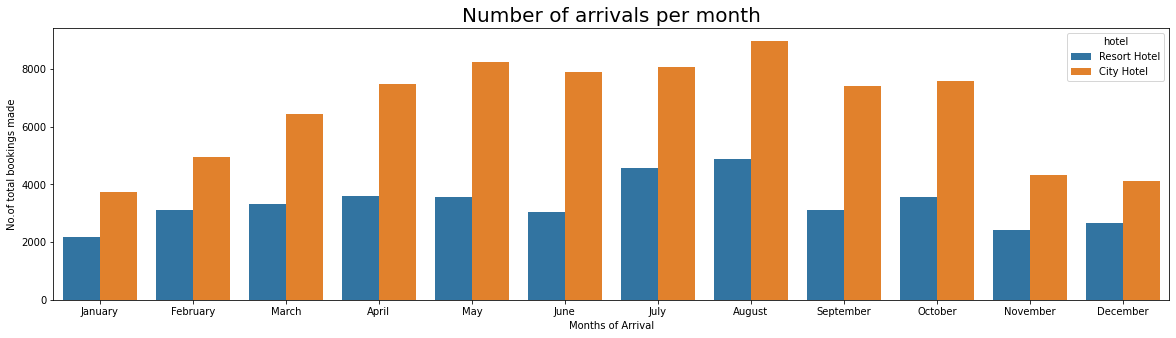

In [ ]:
#Plotting Graph arrival month
plt.figure(figsize=(20,5)) # adjust the size of the plot
#Using seaborns countplot to plot bookings for each hotel types across different months
sns.countplot(data = hotel_df, x = 'arrival_date_month', hue = 'hotel', order =Months).set_title('Number of arrivals per month',fontsize=20)
# Creating label for x-axis
plt.xlabel('Months of Arrival') 
plt.ylabel('No.of total bookings made')

We see a similar trend for both Resort and city hotel


## Plotting Graph for number of arrivals per day

Text(0.5, 1.0, 'Number of arrivals per day')

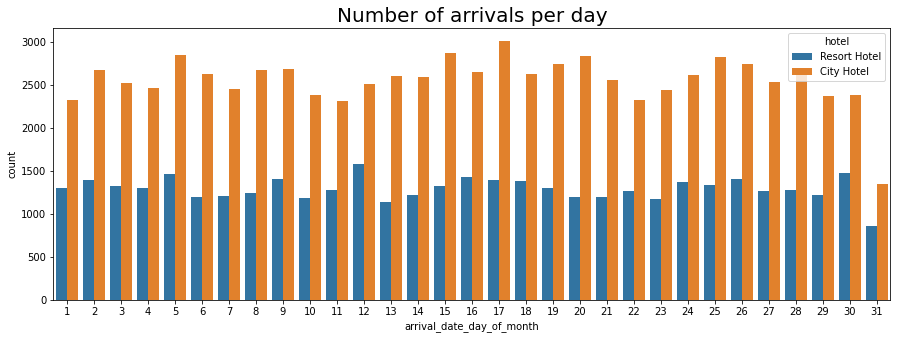

In [ ]:
plt.figure(figsize=(15,5))
#Plotting the Daily booking status for each day.
sns.countplot(data =hotel_df, x = 'arrival_date_day_of_month', hue = 'hotel').set_title('Number of arrivals per day', fontsize = 20)

As we can see the booking across all dates in a month is fairly same with occasional dips around end of month


## Plot the number of weekend night stays

Text(0.5, 1.0, 'Number of stays on weekend nights')

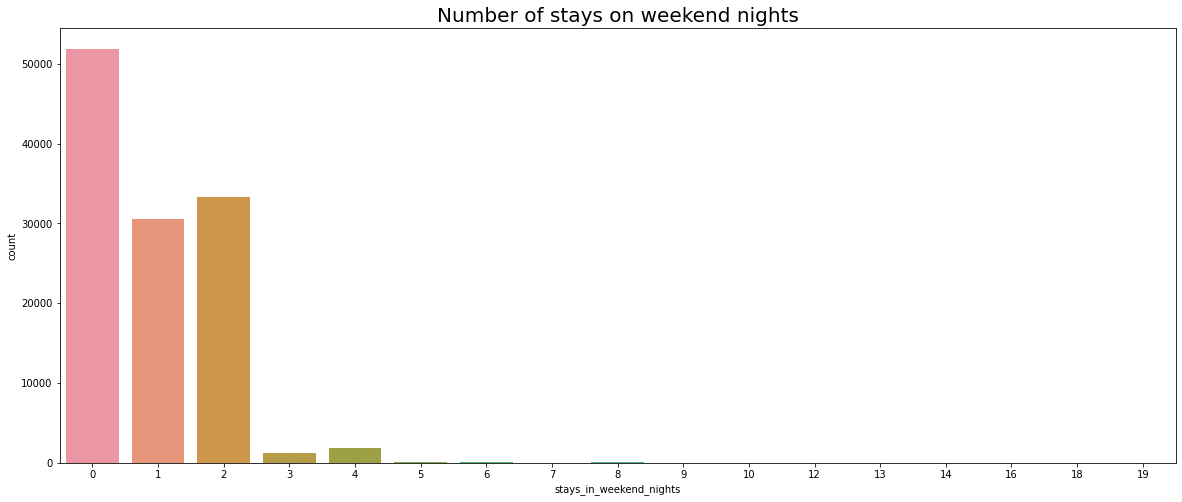

In [ ]:
plt.figure(figsize=(20,8))
#count plot to see the stay in weekend nights
sns.countplot(data = hotel_df, x = 'stays_in_weekend_nights').set_title('Number of stays on weekend nights', fontsize = 20)


As we can see that there isnt much of stays more 2

## Plot the number of weekdays night stays

Text(0.5, 1.0, 'Number of stays on weekday nights')

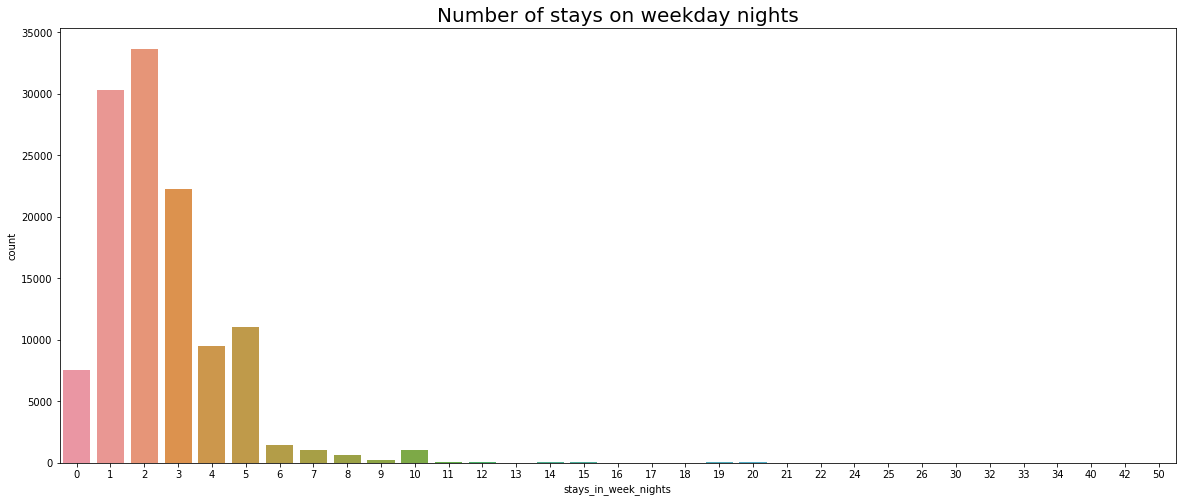

In [267]:
plt.figure(figsize=(20,8))
#count plot to see the stay in weekday nights
sns.countplot(data = hotel_df, x = 'stays_in_week_nights').set_title('Number of stays on weekday nights', fontsize = 20)

With Comparison to weekends we see there are more stays in Weekdays rather than weekends 

## Plotting Number of Adults

Text(0.5, 1.0, 'Number of adults')

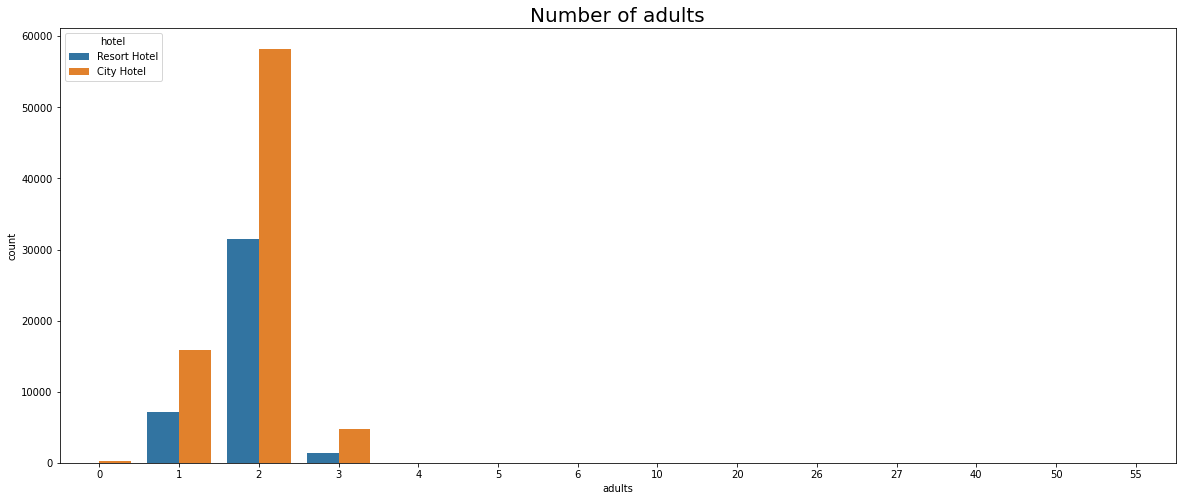

In [268]:
plt.figure(figsize=(20,8))
#Count plot to see Adults
sns.countplot(data = hotel_df, x = 'adults', hue = 'hotel').set_title("Number of adults", fontsize = 20)

As we can see thatin most cases there are 2 adults with most booking indicating couples are more frequent in hotels

## Plotting Graph for Visualizing the Bookings made on the Basis of Country

In [ ]:
#Plotting Graph of Visitors from different Countries
visitors = hotel_df.groupby(['country']).size().reset_index(name = 'count')
#plotting them in world map
px.choropleth(visitors,locations = "country",color= "count", hover_name= "country",color_continuous_scale=px.colors.sequential.Viridis,
                    title="Home country of visitors")

## Plotting Bar plots for different Top 10 Countries

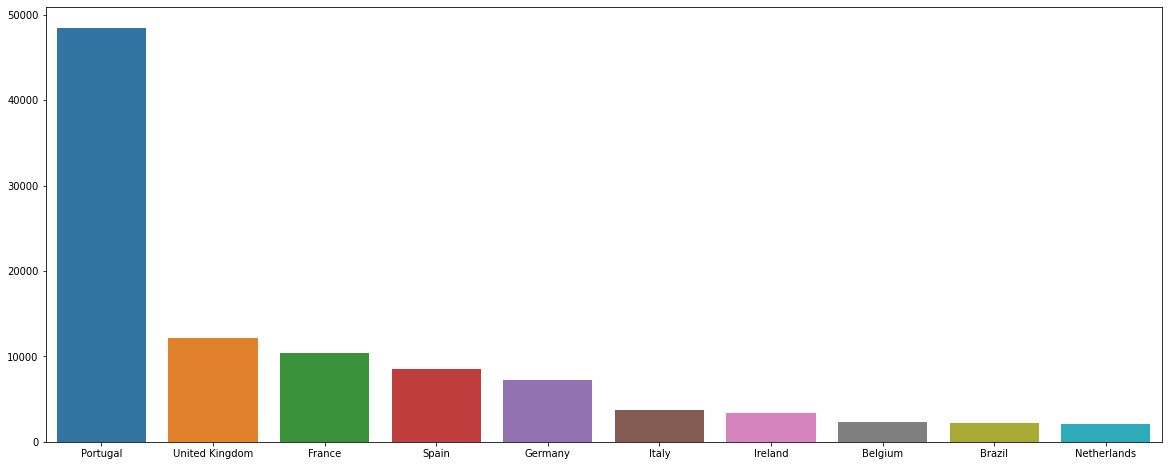

In [ ]:
#module which converts the country shortforms to full names
import pycountry as pc
#getting the top 10 countries
x=hotel_df['country'].value_counts().index.values.tolist()[:10]
#Count of all the country bookings comming from
y=hotel_df['country'].value_counts().values[:10]

Name_list=[pc.countries.get(alpha_3=name).name for name in x]
plt.figure(figsize=(20,8))
sns.barplot(Name_list,y)


We see that majority of the bookings are from Portugal followed by Uk ,France Spain. We see that most of the Hotels are of European Origin

## Visualizing the Types of Deposit Type


In [ ]:
#Seing the different types of Deposit type
hotel_df['deposit_type'].value_counts()

No Deposit    104461
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

Text(0.5, 1.0, 'Graph showing types of deposits')

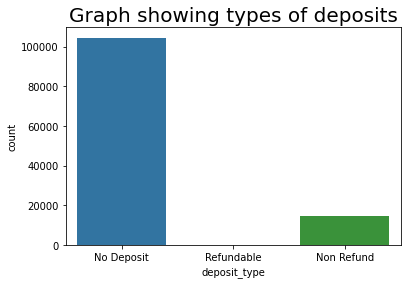

In [ ]:
# Plotting to see the Variations
sns.countplot(data = hotel_df, x = 'deposit_type').set_title('Showing types of deposits', fontsize = 20)

This graph shows us that most of the bookings that are happening are No-Deposit type which might indicate the High rate of Cancellation of Bookings

## Ploting graph for Repeated Guest

Text(0.5, 1.0, 'Showing whether guest is repeated guest')

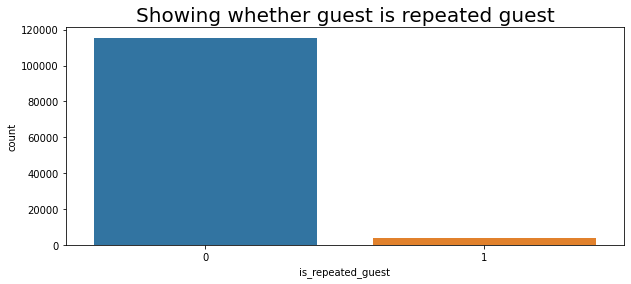

In [ ]:
#Plotting graph repeated guests
plt.figure(figsize=(10,4))
sns.countplot(data = hotel_df, x = 'is_repeated_guest').set_title('Showing whether guest is repeated guest', fontsize = 20)

Plotting Pie Graph for repeated guest

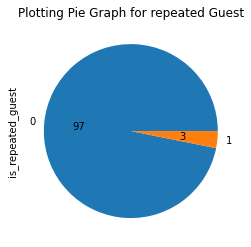

In [ ]:
plt.title('Plotting Pie Graph for repeated Guest')
hotel_df['is_repeated_guest'].value_counts().plot(kind ='pie',autopct='%.0f')

As we can see that 97% of Customers are new customers and the only 3 percent 

## Plotting total of Special Requests

In [ ]:
hotel_df.total_of_special_requests.value_counts()

0    70201
1    33183
2    12952
3     2494
4      340
5       40
Name: total_of_special_requests, dtype: int64

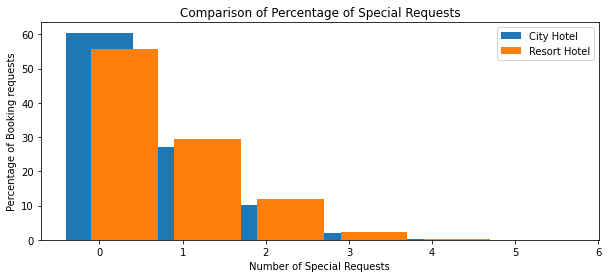

In [259]:
import numpy as np
city_hotel=hotel_df[hotel_df.hotel=='City Hotel']
resort_hotel=hotel_df[hotel_df.hotel=='Resort Hotel']

city_hotel_value_counts=city_hotel['total_of_special_requests'].value_counts()
resort_hotel_value_counts=resort_hotel['total_of_special_requests'].value_counts()

x_city=city_hotel_value_counts.index.values
y_city=city_hotel_value_counts/city_hotel_value_counts.sum()*100

x_resort=resort_hotel_value_counts.index.values
y_resort=resort_hotel_value_counts/resort_hotel_value_counts.sum()*100

plt.figure(figsize=(10,4))
barWidth=0.3
br1=np.arange(len(x_city))
br2=[x + barWidth for x in br1]
plt.title('Comparison of Percentage of Special Requests')
plt.bar(br1,y_city,label='City Hotel')
plt.bar(br2,y_resort,label ='Resort Hotel')
plt.xlabel('Number of Special Requests')
plt.ylabel('Percentage of Booking requests')
plt.legend()

As we can see the special requests are more in resort hotels and more likely special request are not so common except for 1 to 2 special requests are made per booking

## Plotting types of guests based on market Segment

In [ ]:
#Viewing the market segment
hotel_df['market_segment'].value_counts()

Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: market_segment, dtype: int64

Text(0.5, 1.0, 'Showing type of guest based on market segment')

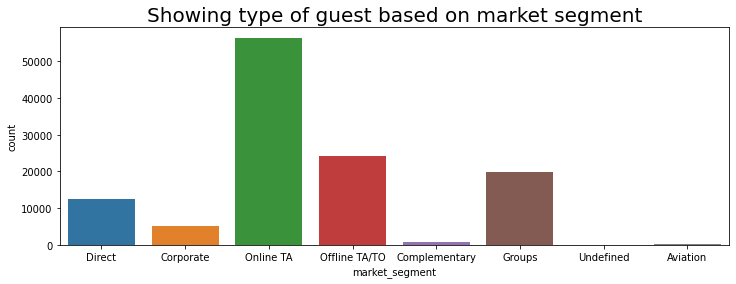

In [ ]:
plt.figure(figsize=(12,4))
#Plotting the countplot of market segment
sns.countplot(data = hotel_df, x = 'market_segment').set_title('Showing type of guest based on market segment', fontsize = 20)


As we can see that most of the bookings were made Online and followed by Offline Bookings

## Plotting Reservation Status

In [ ]:
#Viewing the different Reservation Status type
hotel_df.reservation_status.value_counts() 

Check-Out    75011
Canceled     42993
No-Show       1206
Name: reservation_status, dtype: int64

Text(0.5, 1.0, 'Showing type of Reservation Status of bookings')

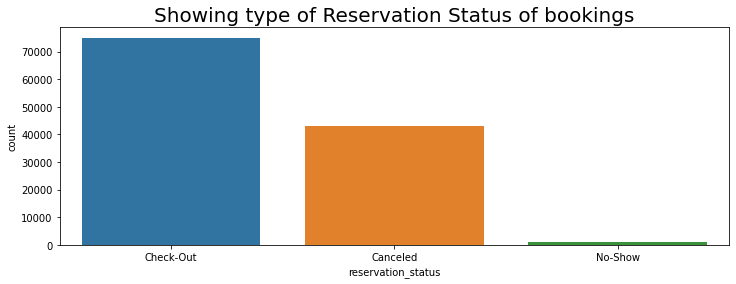

In [ ]:
plt.figure(figsize=(12,4))
#Plotting the countplot of reservation status
sns.countplot(data = hotel_df, x = 'reservation_status').set_title('Showing type of Reservation Status of bookings', fontsize = 20)

Most of the status are checked out with some getting cancelled and a very few percent of no-show

## Plotting types of Customer

In [ ]:
#Viewing Different Types of Customer Types
hotel_df['customer_type'].value_counts()

Transient          89476
Transient-Party    25088
Contract            4072
Group                574
Name: customer_type, dtype: int64

Text(0.5, 1.0, 'Graph showing type of guest')

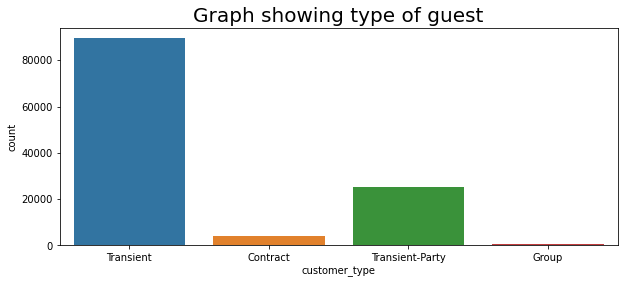

In [ ]:
#Plotting the type of guest
plt.figure(figsize=(10,4))
sns.countplot(data = hotel_df, x = 'customer_type').set_title('Graph showing type of guest', fontsize = 20)

The majority of bookings are transient. This is defined as a booking that is not a part of a group or contract. Booking online independently is becoming increasingly consumer friendly which could explain this data.

## How long people are actually Staying

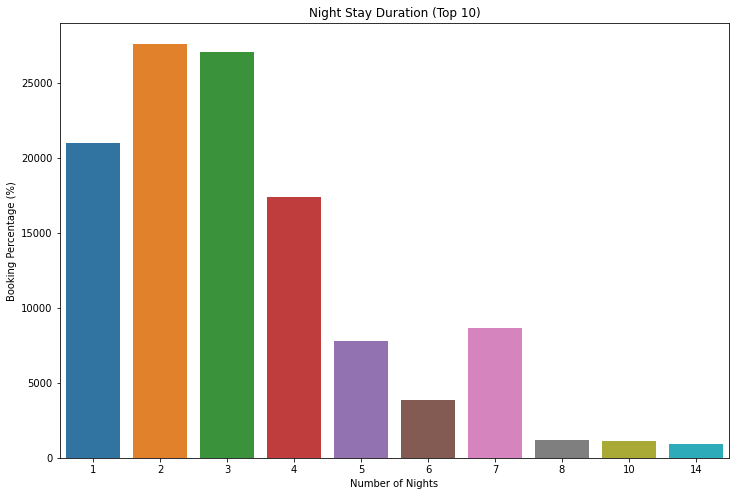

In [ ]:
#Calcultating the total stay of each customer by adding the week and weekend nights
total_nights = hotel_df['stays_in_weekend_nights']+ hotel_df['stays_in_week_nights']
#defining the X anf Y Variables
x=total_nights.value_counts().index.values[:10]
y=total_nights.value_counts().values[:10]
#title and figure size settings
plt.figure(figsize=(12,8))
plt.xlabel('Number of Nights')
plt.ylabel('Booking Percentage (%)')
plt.title('Night Stay Duration (Top 10)')
#plotting bar plot
sns.barplot(x,y)

Most of the people actually Stay for 2 to 3 nights and also a large number live just for a single night and few staying over for longer duration or so.

## Lets look at what type of people are staying in the hotels

In [ ]:
#Single people where adult =1
single_adult=hotel_df[(hotel_df['adults']==1) & (hotel_df['children']==0) & (hotel_df['babies']==0)] 
#Couples where adult =2
Couple=hotel_df[(hotel_df['adults']==2) & (hotel_df['children']==0) & (hotel_df['babies']==0)] 
#families where adult =2 and children and babies are not 0
Family=hotel_df[hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']>2]

In [ ]:
# Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single_adult.shape[0],Couple.shape[0], Family.shape[0]]
count_percent = [x/hotel_df.shape[0]*100 for x in count]

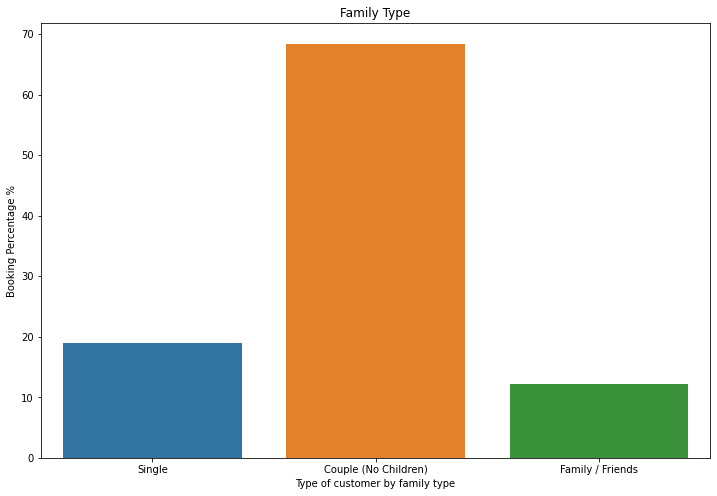

In [ ]:
#Plotting the different categories of famliy type of customer bookings
plt.figure(figsize=(12,8))
plt.xlabel('Type of customer by family type')
plt.ylabel('Booking Percentage %')
plt.title('Family Type')
sns.barplot(names,count_percent)

By this graph we come to conclusion that most of the booking types are done where there are couples followed by single bookings

Checking the Correration of the Data

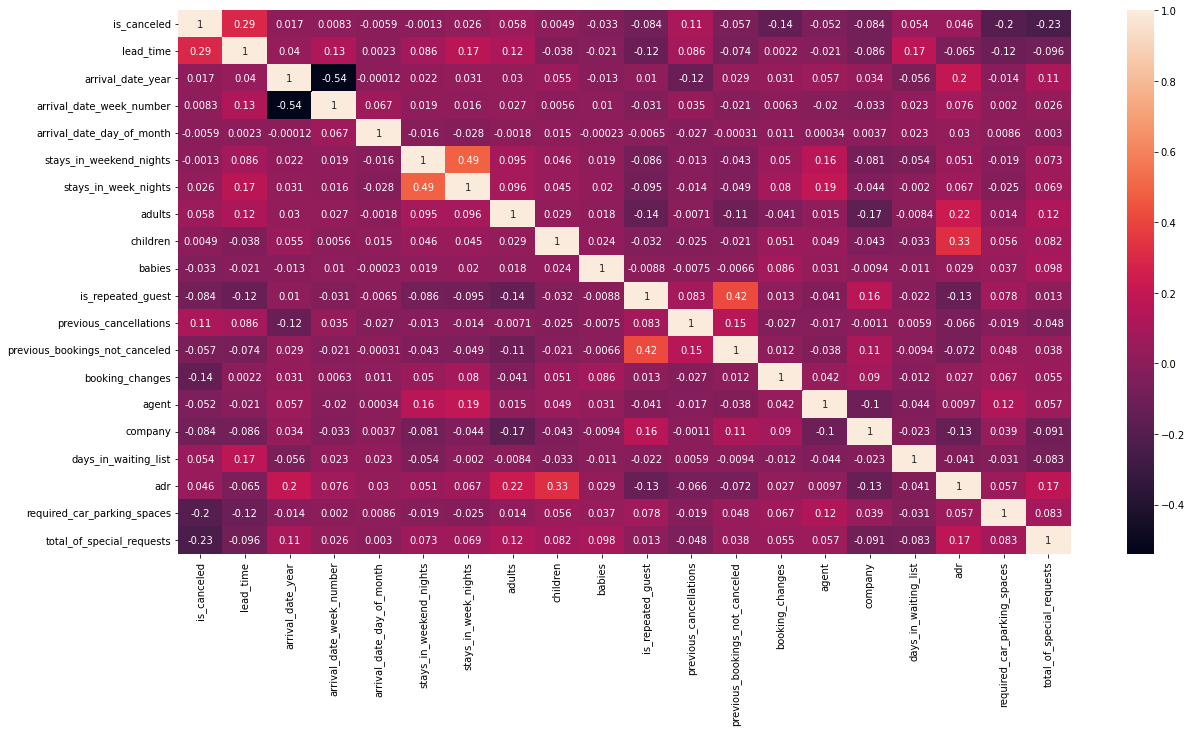

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(hotel_df.corr(),annot=True)


By the correlation matrix we see the different features of the data that are related to each other for example arrival_date_year and arrival_date_month are negatively correlated to each other

#**Summary**

### Through the analysis we were able to answer the following key points.
* Is there a difference in volume of bookings and revenue across the two type of hotels?
* Is the change driven by a time period such as a year or a month?
* Whats the highest number of getting special requests?
* Whats the Optimal Length of stay
* What are the things which govern the bookings

### Insights
* There are two types of Hotel namely City Hotel and Resort Hotel.Most of them are City Hotels and lesser are Resort Hotels(66,34 ratio).
* There is a high rate of Cancelletion (37%) which could be due to many factors one of the factors is the Deposit type where most of the bookings do not have Deposit and very few are Refundable and less numbers are Non Refundable
* Average Daily Revenue of City Hotels are Slightly Higher than Resort Hotels. 

